In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
raw_data = pd.read_csv(r"Datasets\MAL Anime Top 10000 Details.csv.zip")
TV_data = pd.read_csv(r"Datasets\TV_data.csv")
TV_data_manga = pd.read_csv(r"Datasets\TV_data_manga.csv")

# Raw data 

In [6]:
raw_data

,Anime Title,MAL Url,English,Japanese,Type,Episodes,Status,Aired,Premiered,Broadcast,...,Source,Genres,Duration,Rating,Score,Ranking,Popularity,Members,Favorites,Summary
0,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17:00 (JST),...,Manga,"Action, Military, Adventure, Comedy, Drama, Ma...",24 min. per ep.,R - 17+ (violence & profanity),9.22,1,4,2025613,167812,"""In order for something to be obtained, someth..."
1,Steins;Gate,https://myanimelist.net/anime/9253/Steins_Gate,Steins;Gate,STEINS;GATE,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02:05 (JST),...,Visual novel,"Thriller, Sci-Fi",24 min. per ep.,PG-13 - Teens 13 or older,9.12,2,8,1636151,139909,The self-proclaimed mad scientist Rintarou Oka...
2,Gintama°,https://myanimelist.net/anime/28977/Gintama°,Gintama Season 4,銀魂°,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Wednesdays at 18:00 (JST),...,Manga,"Action, Comedy, Historical, Parody, Samurai, S...",24 min. per ep.,PG-13 - Teens 13 or older,9.11,3,330,363879,10353,"Gintoki, Shinpachi, and Kagura return as the f..."
3,Hunter x Hunter (2011),https://myanimelist.net/anime/11061/Hunter_x_H...,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,TV,148,Finished Airing,"Oct 2, 2011 to Sep 24, 2014",Fall 2011,Sundays at 10:55 (JST),...,Manga,"Action, Adventure, Fantasy, Shounen, Super Power",23 min. per ep.,PG-13 - Teens 13 or older,9.11,4,14,1459320,130492,Hunter x Hunter is set in a world where Hunter...
4,Ginga Eiyuu Densetsu,https://myanimelist.net/anime/820/Ginga_Eiyuu_...,Legend of the Galactic Heroes,銀河英雄伝説,OVA,110,Finished Airing,"Jan 8, 1988 to Mar 17, 1997",NaN,NaN,...,Novel,"Military, Sci-Fi, Space, Drama",26 min. per ep.,R - 17+ (violence & profanity),9.10,5,629,212162,13100,The 150-year-long stalemate between the two in...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Roba Chotto Suneta,https://myanimelist.net/anime/30076/Roba_Chott...,NaN,ロバちょっとすねた,Music,1,Finished Airing,"Apr 3, 1983",NaN,NaN,...,Original,"Kids, Music",2 min.,G - All Ages,5.24,9997,13717,255,0,A music video for the song by Agnes Chan that ...
9996,Ski Jumping Pairs: Road to Torino 2006,https://myanimelist.net/anime/10627/Ski_Jumpin...,NaN,スキージャンプ・ペア ~Road to TORINO 2006~,Movie,1,Finished Airing,"Jan 28, 2006",NaN,NaN,...,Unknown,"Comedy, Sports",4 min.,G - All Ages,5.24,9998,12571,370,1,A CG animated film by Riichiro Mashima.\n\r\nA...
9997,Tentoumushi no Otomurai,https://myanimelist.net/anime/12521/Tentoumush...,Ladybirds' Requiem,てんとう虫のおとむらい,Movie,1,Finished Airing,2006,NaN,NaN,...,Original,"Music, Dementia",5 min.,G - All Ages,5.24,9999,11865,494,2,"The story of the animation begins from a girl,..."
9998,The Baby Birds of Norman McLaren,https://myanimelist.net/anime/28765/The_Baby_B...,NaN,The Baby Birds of Norman McLaren,Movie,1,Finished Airing,2014,NaN,NaN,...,Unknown,Music,3 min.,G - All Ages,5.24,10000,12098,452,0,Celebrating the 100th year of birth of Norman ...


### We decided to focus on anime TV series as it is the biggest type by a large margin and unfair to compare with other types

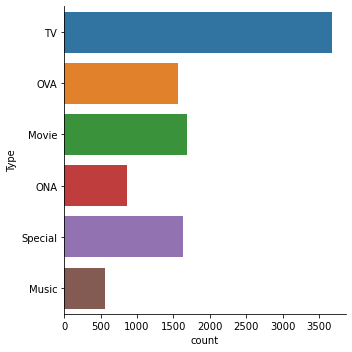

In [7]:
sb.catplot(y = 'Type', data = raw_data[raw_data.groupby('Type').Type.transform('count') > 25], kind='count')

## Sorting by studios

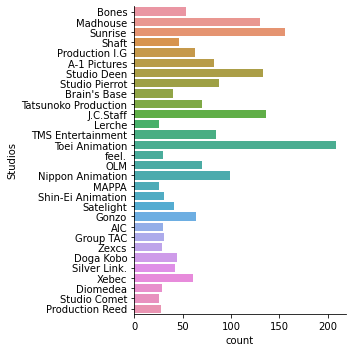

In [8]:
sb.catplot(y = 'Studios', data = TV_data[TV_data.groupby('Studios').Studios.transform('count') > 25], kind='count')

## As most anime is sourced from manga, we decided to narrow our scope to focus on manga sourced anime

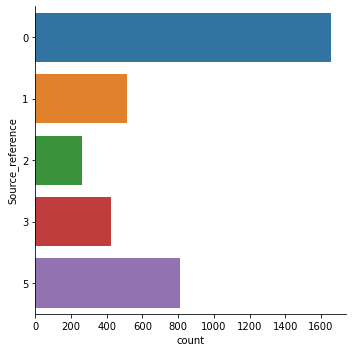

In [9]:
sb.catplot(y = 'Source_reference', data = TV_data[TV_data.groupby('Source_reference').Studios.transform('count') > 25], kind='count')

## Very little correlation between the DV (Score) and most IVs, note the medium correlation of 0.4661 for Score/Members and a decent correlation of 0.6068 for Score/Fav%

In [25]:
TV_data_manga.corr()

,Unnamed: 0,Score,Members,Favorites,Fav%,Source_reference,genre_reference_1,genre_reference_2,Season,Manga_score,Age
Unnamed: 0,1.000000,-0.663701,-0.249400,-0.174090,-0.321367,NaN,0.048128,0.028610,-0.002987,-0.089673,0.044829
Score,-0.663701,1.000000,0.466117,0.352815,0.606833,NaN,-0.066860,-0.020368,0.043568,0.159588,-0.105206
Members,-0.249400,0.466117,1.000000,0.786969,0.602406,NaN,-0.048236,0.008871,0.040608,0.113338,-0.232137
Favorites,-0.174090,0.352815,0.786969,1.000000,0.727081,NaN,-0.060162,-0.028852,0.045102,0.154216,-0.067978
Fav%,-0.321367,0.606833,0.602406,0.727081,1.000000,NaN,-0.054765,-0.045492,0.052974,0.205884,0.025442
Source_reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre_reference_1,0.048128,-0.066860,-0.048236,-0.060162,-0.054765,NaN,1.000000,-0.097250,-0.054127,-0.089626,-0.122716
genre_reference_2,0.028610,-0.020368,0.008871,-0.028852,-0.045492,NaN,-0.097250,1.000000,-0.008476,-0.028671,-0.044388
Season,-0.002987,0.043568,0.040608,0.045102,0.052974,NaN,-0.054127,-0.008476,1.000000,0.012119,0.042145
Manga_score,-0.089673,0.159588,0.113338,0.154216,0.205884,NaN,-0.089626,-0.028671,0.012119,1.000000,0.080111


## Plotting graph of score vs manga score, note the low correlation

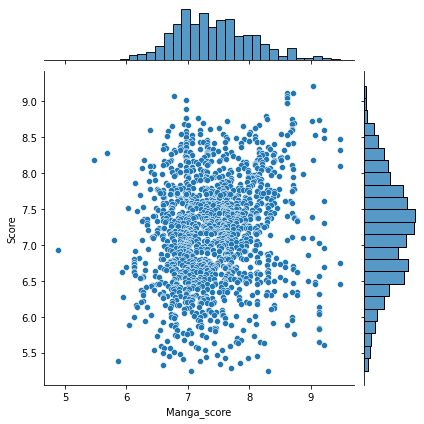

In [10]:
sb.jointplot(y = 'Score', x = 'Manga_score', data = TV_data_manga)

## Plotting graph of genre 1 and genre 2

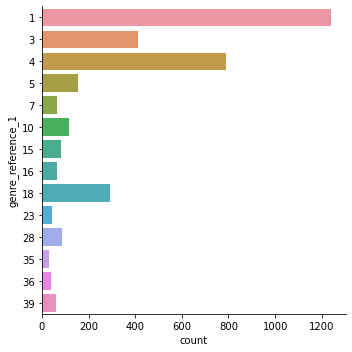

In [11]:
sb.catplot(y = 'genre_reference_1', data = TV_data[TV_data.groupby('genre_reference_1').Studios.transform('count') > 25], kind='count')

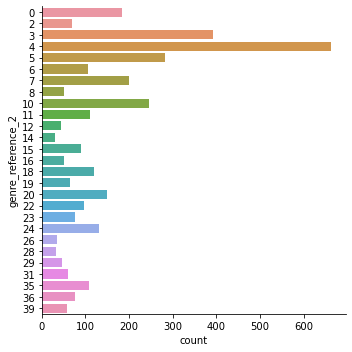

In [12]:
sb.catplot(y = 'genre_reference_2', data = TV_data[TV_data.groupby('genre_reference_2').Studios.transform('count') > 25], kind='count')

## Plotting graph of score reference and manga score

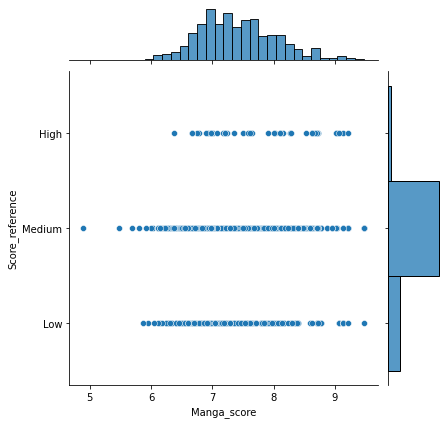

In [13]:
sb.jointplot(y = 'Score_reference', x = 'Manga_score', data = TV_data_manga)

## Plotting graph of score reference and genre 1

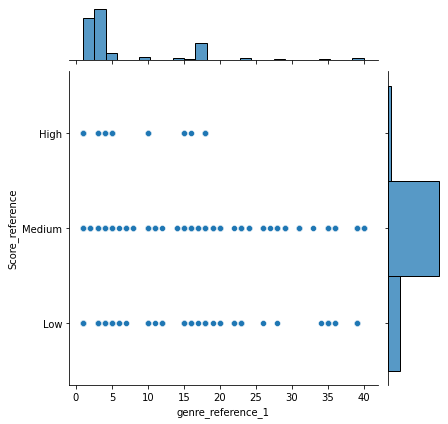

In [14]:
sb.jointplot(y = 'Score_reference', x = 'genre_reference_1', data = TV_data_manga)

## Plotting graph of score reference and members, note that all animes with Members >50,000 have a medium or high score

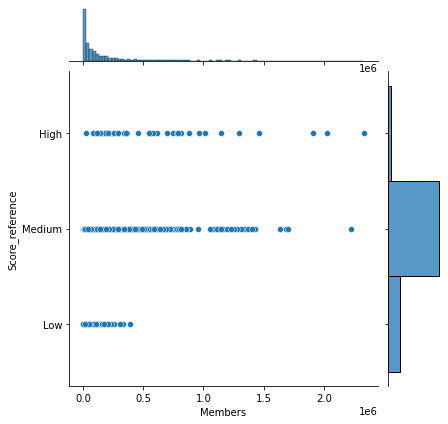

In [26]:
sb.jointplot(y = 'Score', x = 'Members', data = TV_data_manga)

## Plotting graph of score and favorites, note that all animes with Favourites >25,000 have Score >7.5

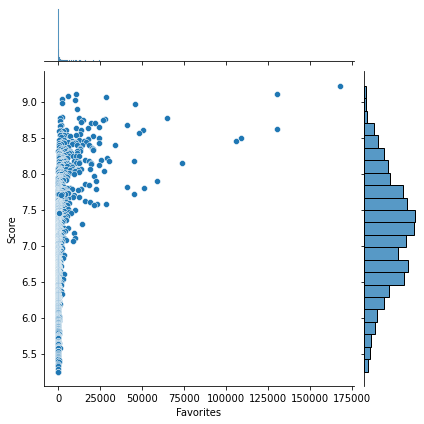

In [24]:
sb.jointplot(y = 'Score', x = 'Favorites', data = TV_data_manga)

## Plotting graph of score reference 2 and manga score

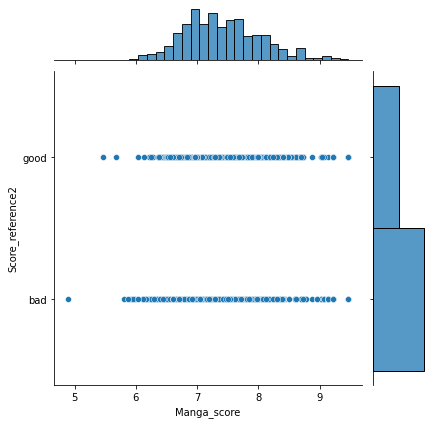

In [32]:
sb.jointplot(y = 'Score_reference2', x = 'Manga_score', data = TV_data_manga)

## Plotting graph of score reference 2 and favorites, higher favorite count (>25,000) -> "good" anime

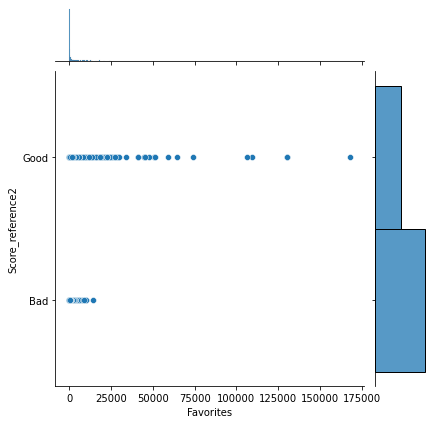

In [28]:
sb.jointplot(y = 'Score_reference2', x = 'Favorites', data = TV_data_manga)

## Seasons and score reference 2, no relationship can be observed

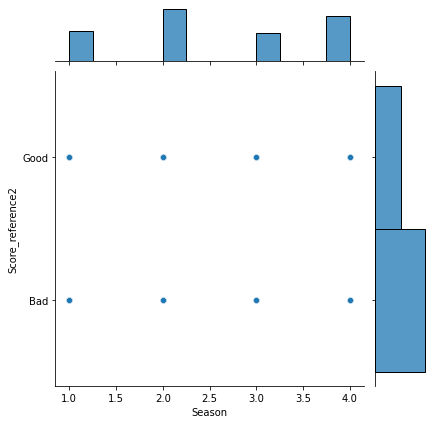

In [23]:
sb.jointplot(y = 'Score_reference2', x = 'Season', data = TV_data_manga)

## Plotting age and favorites/members to determine the cut off age as 5 years

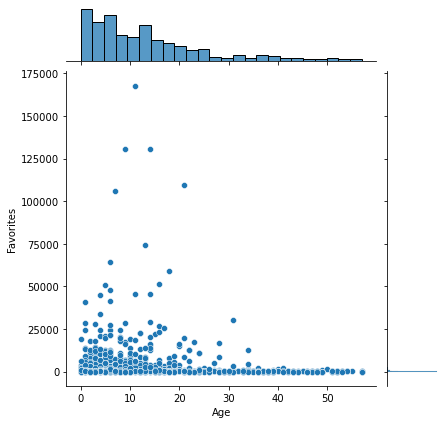

In [29]:
sb.jointplot(x = "Age", y = "Favorites", data = TV_data_manga)

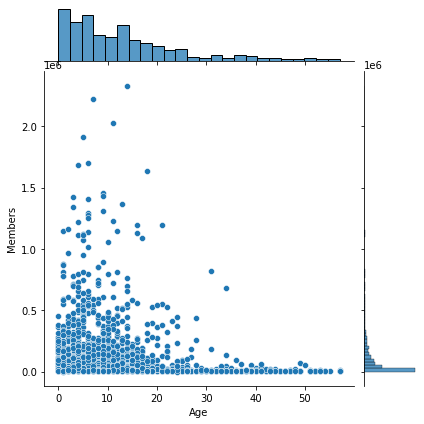

In [30]:
sb.jointplot(x = "Age", y = "Members", data = TV_data_manga)